# Análisis dataset diamonds

Descripción columnas:

* carat: Esta es una medida del tamaño del diamante. Un quilate equivale a 200 miligramos en peso. Como tal, esta es una medida continua de la cantidad de materia de la que está compuesto un diamante.

* cut: Esta es una medida de la calidad del corte de un diamante. Esta es una variable categórica que puede tomar uno de los siguientes cinco valores: "Fair", "Good", "Very Good", "Premium", "Ideal". En este orden, "Ideal" es el mejor corte y "Fair" es el peor.

* color: Esta es una medida del color del diamante. En el mundo de los diamantes, los diamantes menos coloridos son más valiosos. Esta es una variable categórica que puede tomar uno de los siguientes siete valores, de peor a mejor: J (peor), I, H, G, F, E, D (mejor).

* clarity: Esta es una medida de qué tan claro es el diamante, es decir, qué tan visibles son las inclusiones y las imperfecciones. Esta es una variable categórica que puede tomar uno de los siguientes ocho valores, de peor a mejor: I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor).

* depth: Esta es la relación de profundidad total porcentaje = z / media(x, y) = 2 * z / (x + y) (x es la longitud, y es la anchura, z es la profundidad).

* table: El tamaño de la mesa (la parte superior plana del diamante) relativo al tamaño del diamante. Se mide como un porcentaje del diámetro más ancho del diamante.

* price: El precio del diamante en dólares estadounidenses ($).

* x: La longitud del diamante en mm.

* y: La anchura del diamante en mm.

* z: La profundidad del diamante en mm.: Esta es una medida del tamaño del diamante. Un quilate equivale a 200 miligramos en peso. Como tal, esta es una medida continua de la cantidad de materia de la que está compuesto un diamante.

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [41]:
df.shape

(53940, 10)

## Análisis univariante

Gráficos que analizan una variable al mismo tiempo.

* sns.displot()
* sns.ecdfplot()
* sns.countplot()
* sns.kdeplot()
* sns.rugplot()
* sns.countplot()
* sns.boxplot

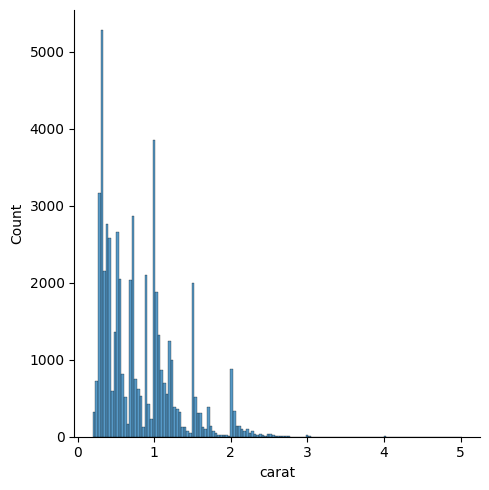

In [42]:
sns.displot(data=df, x="carat")

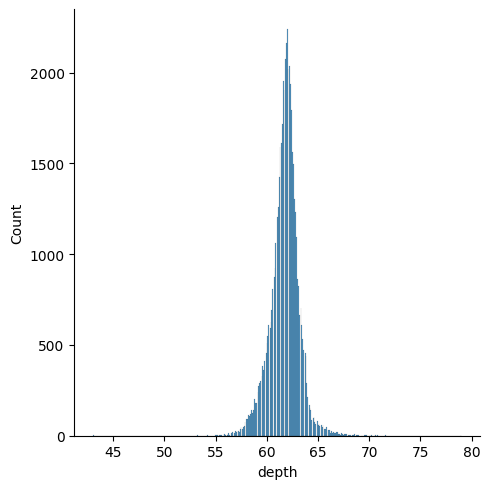

In [43]:
sns.displot(data=df, x="depth")

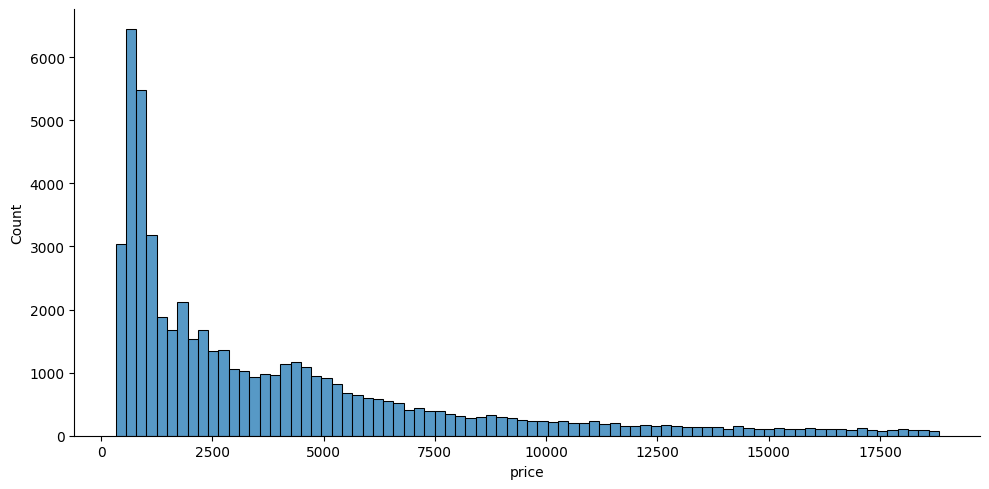

In [44]:
sns.displot(data=df, x="price", height=5, aspect=2)

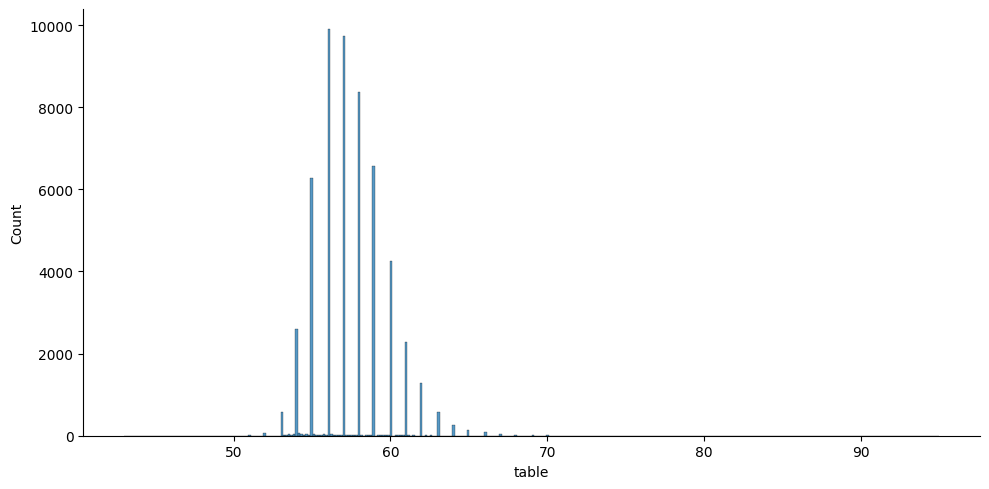

In [45]:
sns.displot(data=df, x="table", height=5, aspect=2)

(0.0, 9.0)

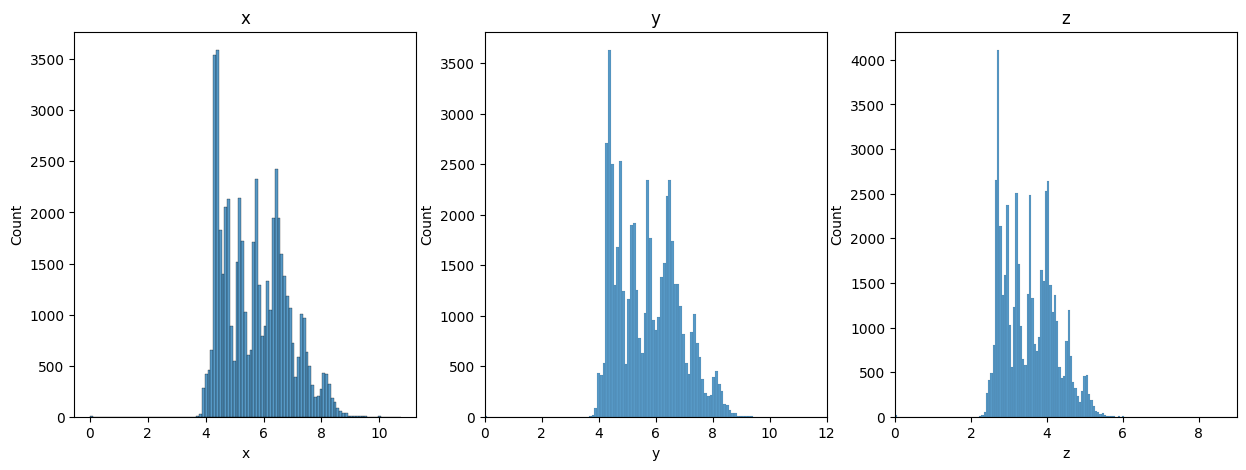

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# distplot no deja porque tiene su propia gráfica no se puede añadir en subplots
sns.histplot(data=df, x="x", ax=axes[0])
axes[0].set_title('x')

sns.histplot(data=df, x="y", ax=axes[1])
axes[1].set_title('y')
axes[1].set_xlim([0, 12]) # cambiar los límites del eje x

sns.histplot(data=df, x="z", ax=axes[2])
axes[2].set_title('z')
axes[2].set_xlim([0, 9])



In [47]:
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


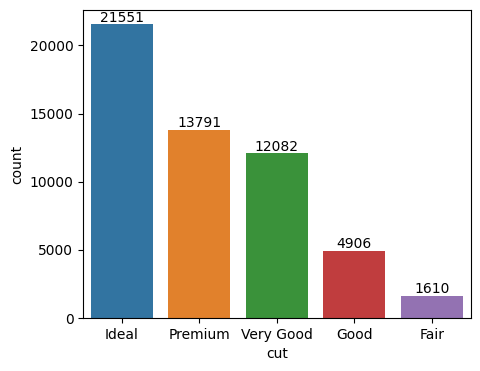

In [48]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x="cut")
ax.bar_label(ax.containers[0]);

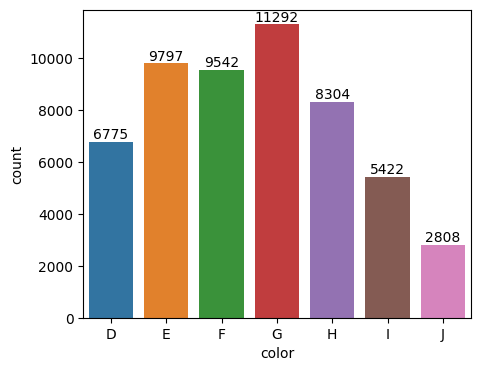

In [49]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x="color")
ax.bar_label(ax.containers[0]);

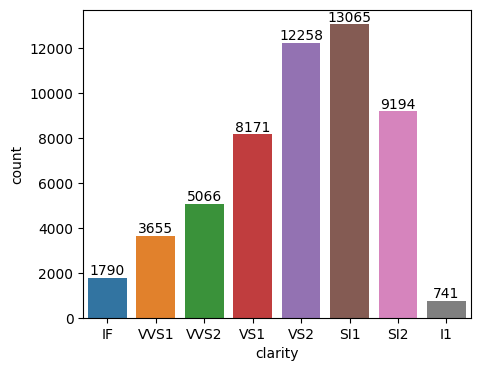

In [50]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x="clarity")
# ax.set_ylim([10000, 15000])
ax.bar_label(ax.containers[0]);


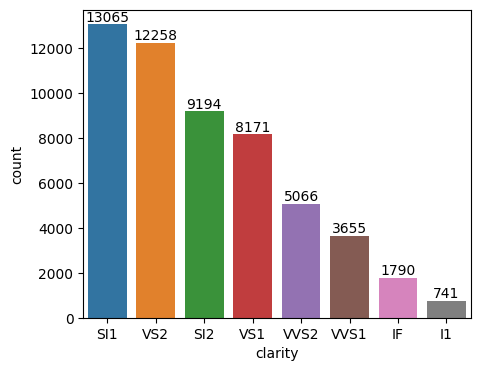

In [51]:
plt.figure(figsize=(5,4))
order = df['clarity'].value_counts(ascending=False).index
ax = sns.countplot(data=df, x='clarity', order=order)
ax.bar_label(ax.containers[0]);


<AxesSubplot: xlabel='depth', ylabel='Density'>

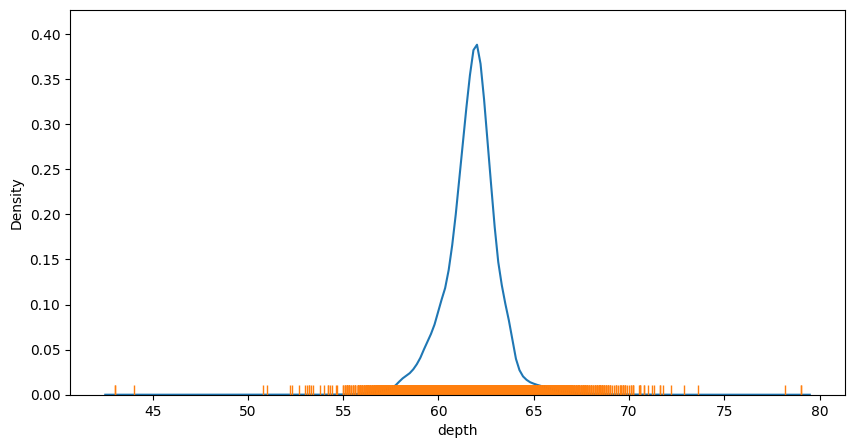

In [52]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="depth")
sns.rugplot(data=df, x="depth")

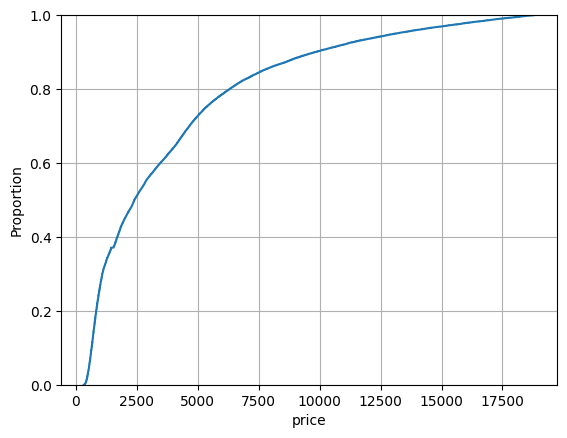

In [53]:
sns.ecdfplot(data=df, x='price')
plt.grid()

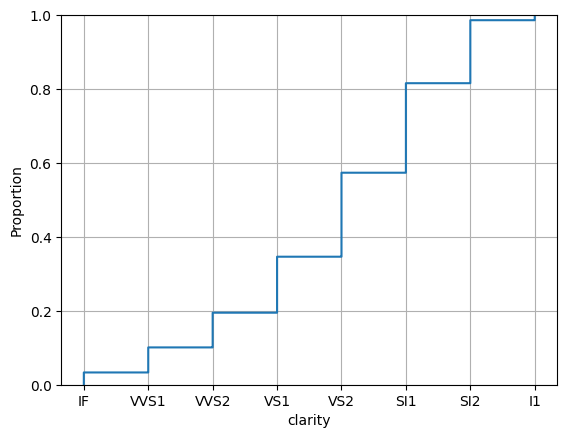

In [54]:
sns.ecdfplot(data=df, x='clarity')
plt.grid()

<AxesSubplot: xlabel='price'>

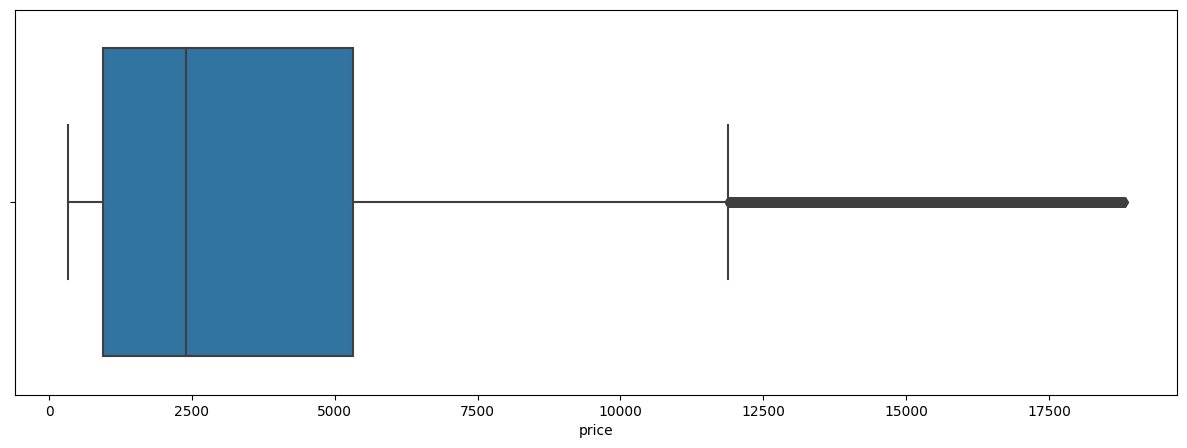

In [55]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='price')

<AxesSubplot: ylabel='price'>

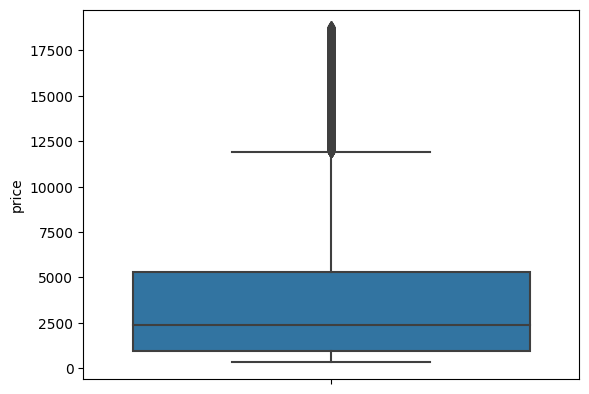

In [56]:
sns.boxplot(data=df, y='price')

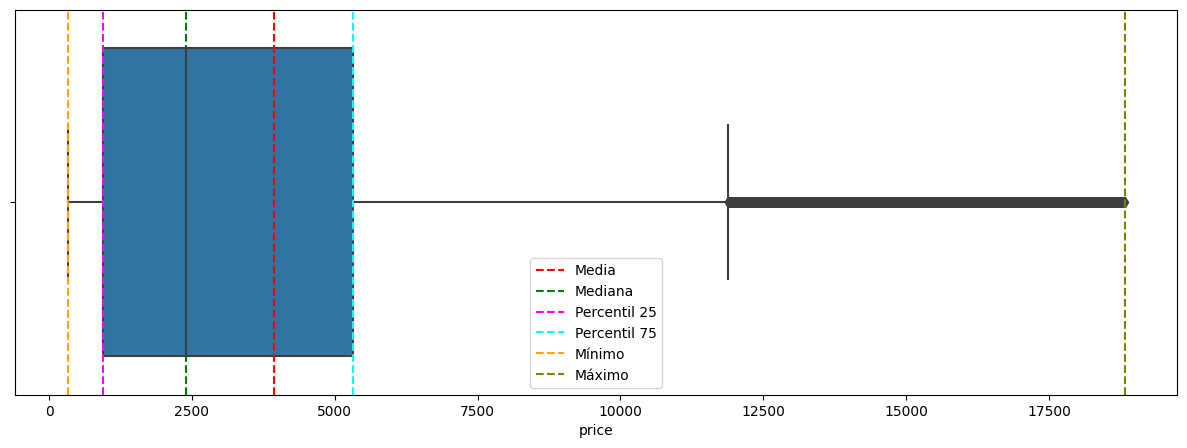

In [57]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='price')
mean_line = plt.axvline(df['price'].mean(), color='r', linestyle='--')
median_line = plt.axvline(df['price'].median(), color='g', linestyle='--')
p25_line = plt.axvline(df['price'].quantile(0.25), color='magenta', linestyle='--')
p75_line = plt.axvline(df['price'].quantile(0.75), color='cyan', linestyle='--')
min_line = plt.axvline(df['price'].min(), color="orange", linestyle="--")
max_line = plt.axvline(df['price'].max(), color="olive", linestyle="--")

plt.legend(
    [mean_line, median_line, p25_line, p75_line, min_line, max_line], 
    ['Media', 'Mediana', 'Percentil 25', 'Percentil 75', 'Mínimo', 'Máximo']
    )

## Análisis bivariante

Gráficos que analizan dos variables al mismo tiempo.

* sns.relplot()
* sns.jointplot()
* sns.lineplot()
* sns.rugplot()
* sns.barplot()
* sns.boxplot()

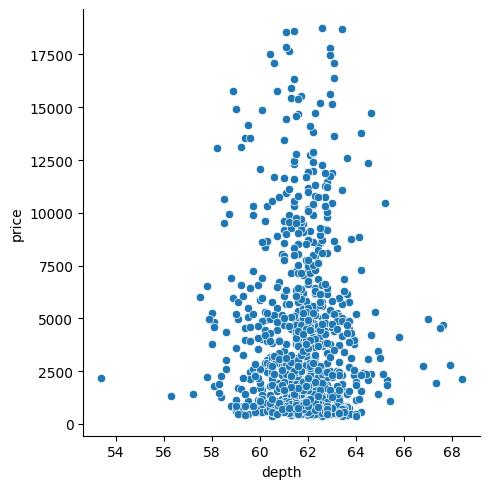

In [58]:
df_sample = df.sample(1000)
sns.relplot(data=df_sample, x='depth', y='price')

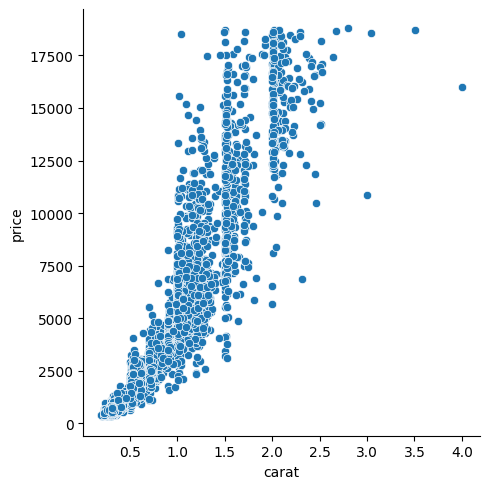

In [59]:
# 0.5 gramos = 500 mg
df_sample = df.sample(5000)
sns.relplot(data=df_sample, x='carat', y='price')

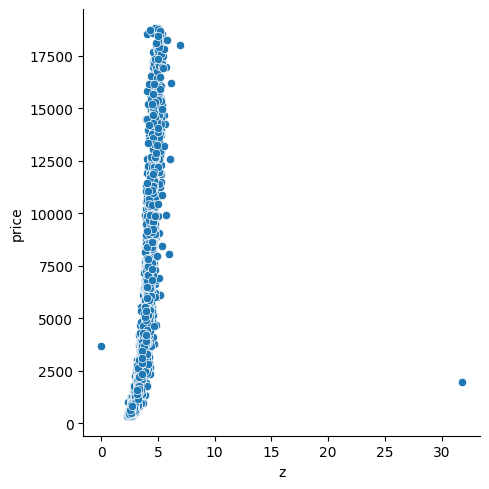

In [60]:
df_sample = df.sample(5000)
sns.relplot(data=df_sample, x='z', y='price')

Text(0.5, 1.0, 'Relación entre precio y quilates')

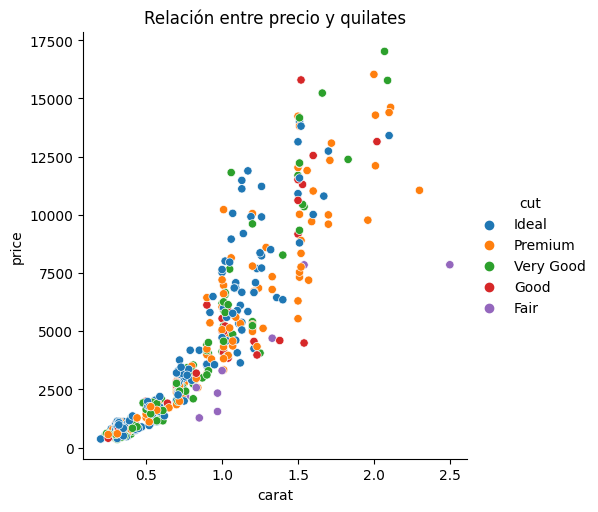

In [61]:
df_sample = df.sample(500)
sns.relplot(data=df_sample, x='carat', y='price', hue='cut')
plt.title("Relación entre precio y quilates")
# "Fair", "Good", "Very Good", "Premium", "Ideal". 
# En este orden, "Ideal" es el mejor corte y "Fair" es el peor.

Text(0.5, 1.0, 'Distribución de precios por color de diamante')

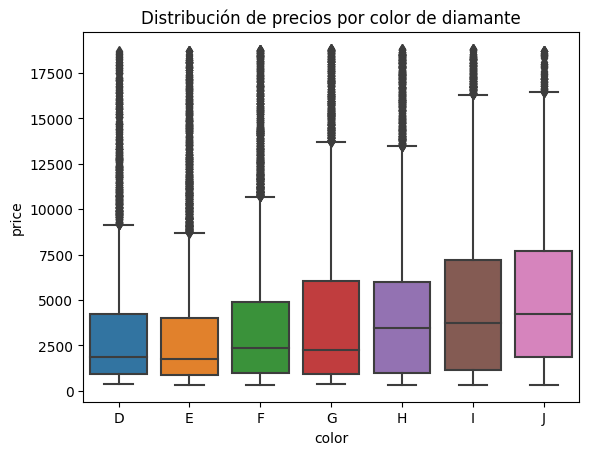

In [62]:
sns.boxplot(data=df, x='color', y='price')
plt.title('Distribución de precios por color de diamante')

Text(0.5, 1.0, 'Distribución de precios por claridad de diamante')

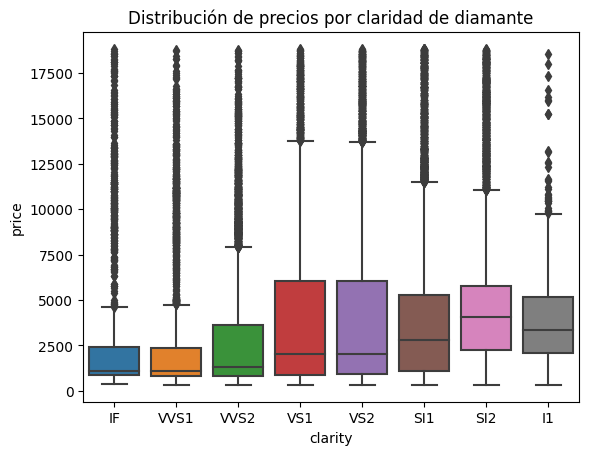

In [63]:
sns.boxplot(data=df, x='clarity', y='price')
plt.title('Distribución de precios por claridad de diamante')

Text(0.5, 1.0, 'Precio promedio por clarity')

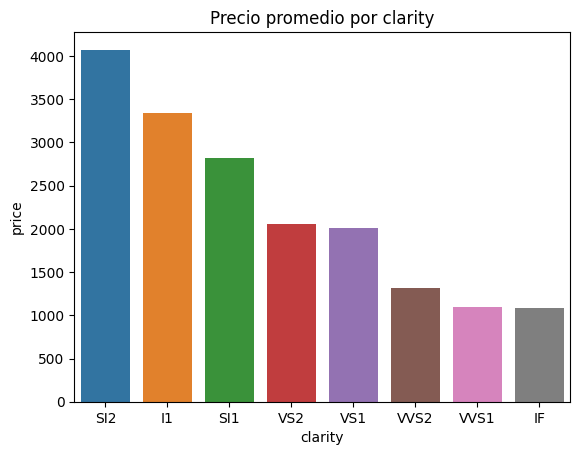

In [64]:
df_price_by_clarity = df.groupby('clarity')['price'].median().reset_index().sort_values('price', ascending=False)
sns.barplot(data=df_price_by_clarity, x='clarity', y='price', errorbar=None, order=df_price_by_clarity['clarity'])
plt.title("Precio promedio por clarity")

Text(0.5, 1.0, 'Precio promedio por cut')

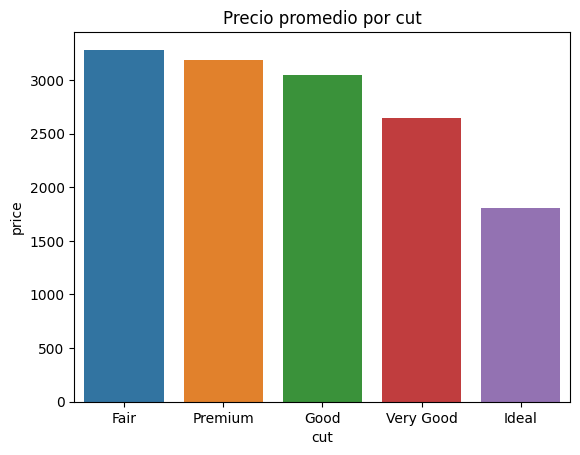

In [65]:
df_price_by_cut = df.groupby('cut')['price'].median().reset_index().sort_values('price', ascending=False)
sns.barplot(data=df_price_by_cut, x='cut', y='price', errorbar=None, order=df_price_by_cut['cut'])
plt.title("Precio promedio por cut")
# plt.grid()

<AxesSubplot: xlabel='cut', ylabel='price'>

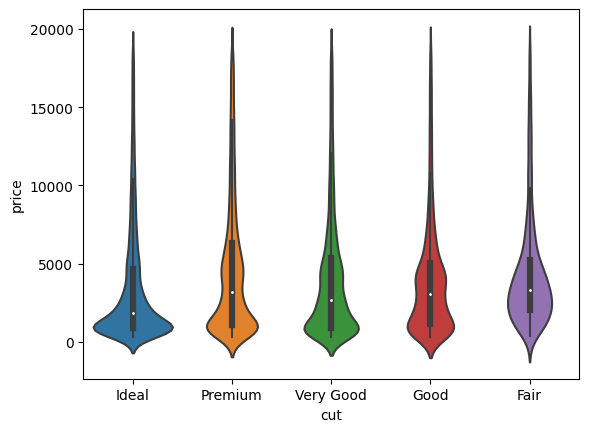

In [66]:
# sns.violinplot: price en base cut, clarity, color
sns.violinplot(data=df, x='cut', y='price')

<AxesSubplot: xlabel='cut', ylabel='carat'>

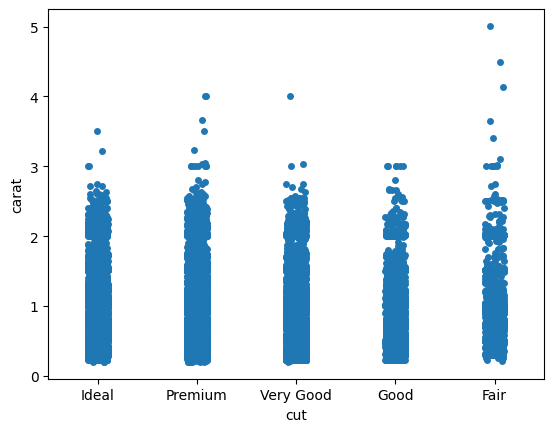

In [67]:
# sns.stripplot
sns.stripplot(data=df, x='cut', y='carat')

<AxesSubplot: xlabel='cut', ylabel='price'>

c:\Users\Jholman Cuartas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


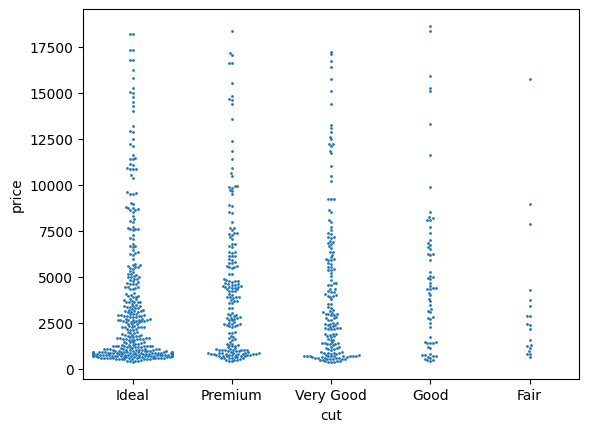

In [68]:
# sns.swarmplot: CUIDADO consume recursos dado que no superpone los puntos
sns.swarmplot(data=df.sample(800), x='cut', y='price', size=2)


<AxesSubplot: xlabel='cut', ylabel='price'>

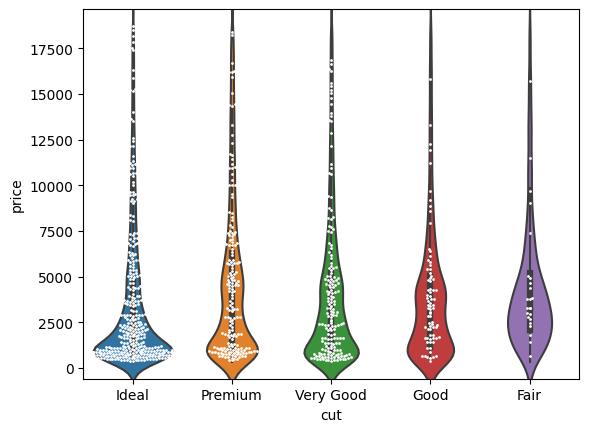

In [69]:
sns.violinplot(data=df, x='cut', y='price')
sns.swarmplot(data=df.sample(800), x='cut', y='price', size=2, color='white')


## Análisis multivariante

Gráficos para analizar más de dos variables al mismo tiempo.

* sns.boxplot
* sns.pairplot()
* sns.replot() con hue, col, row, size
* sns.heatmap()
* sns.clustermap()

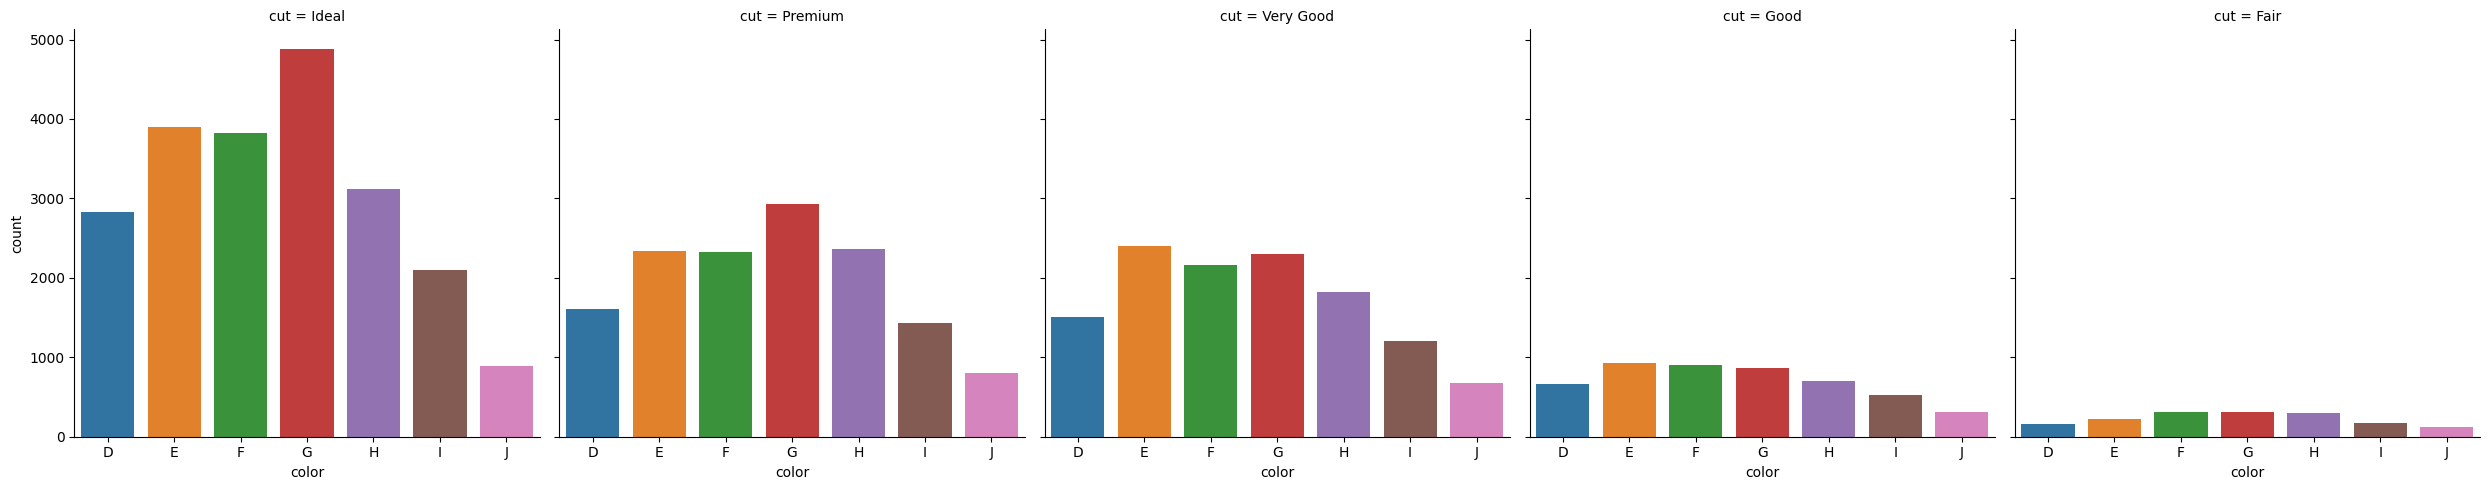

In [70]:
sns.catplot(data=df, x='color', col='cut', kind='count')

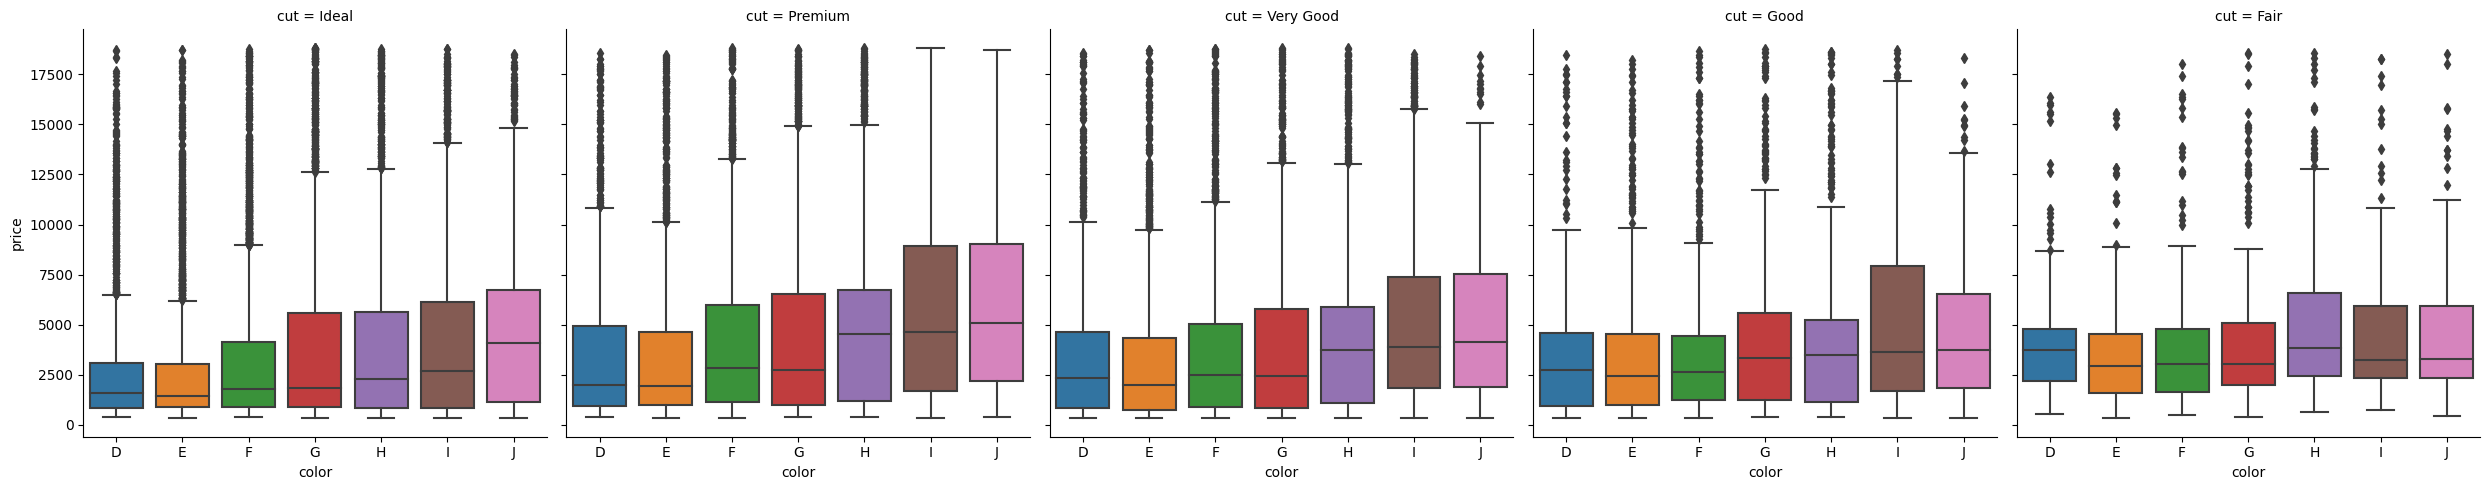

In [71]:
sns.catplot(data=df, x='color', y='price', col='cut',kind='box')

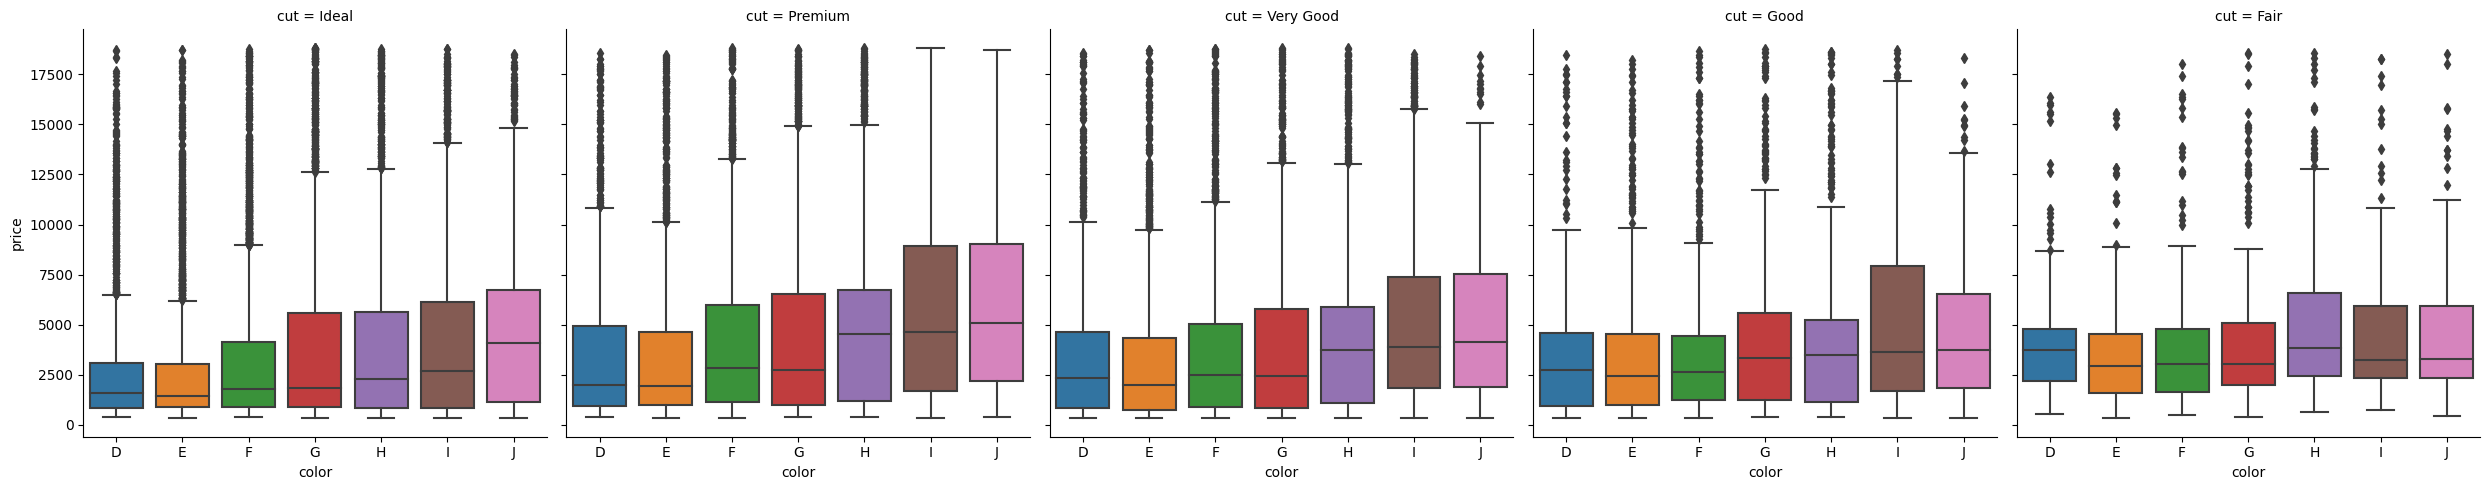

In [72]:
sns.catplot(data=df, x='color', y='price', col='cut',kind='box')

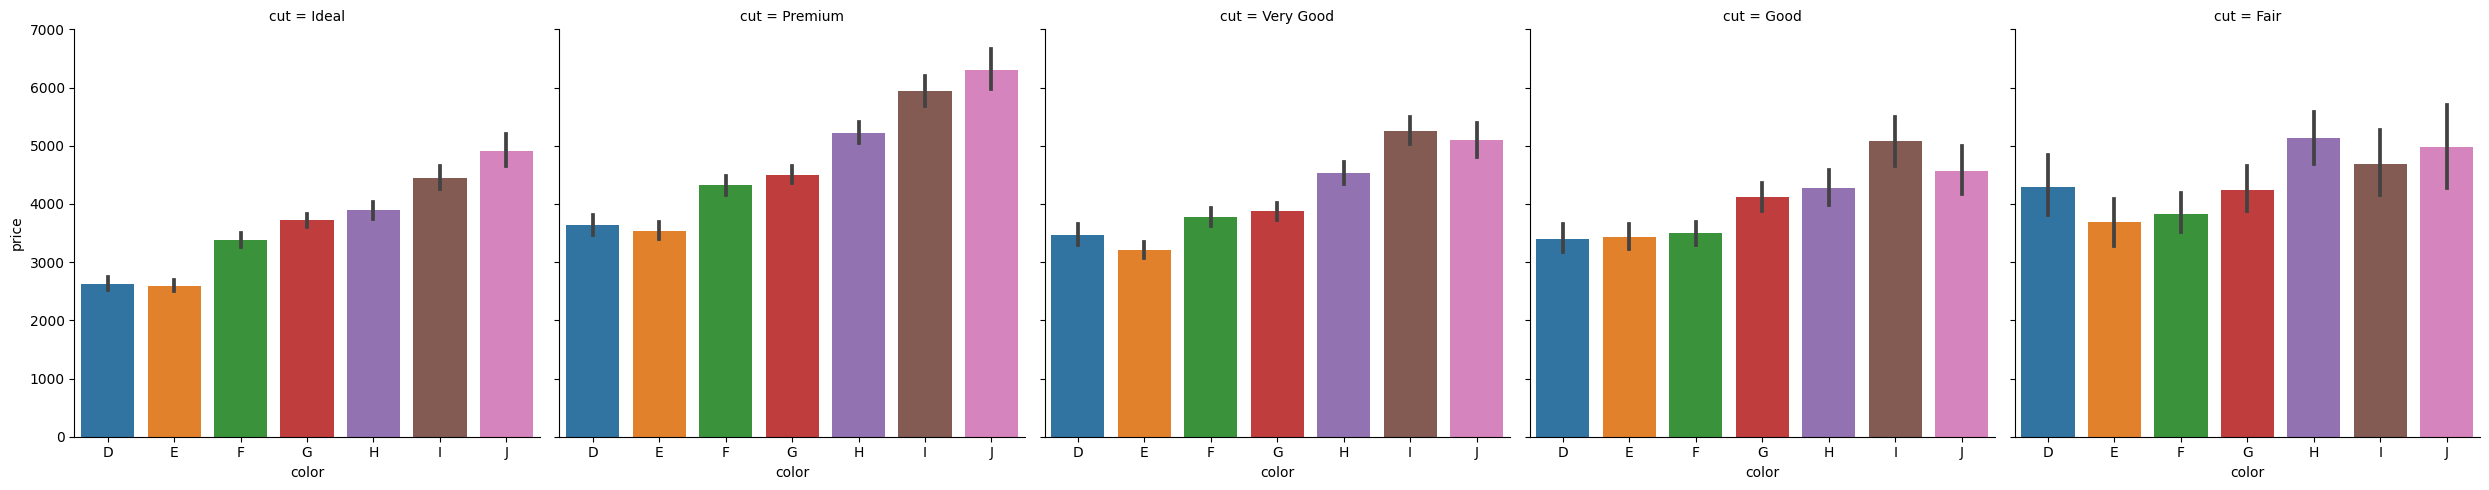

In [73]:
sns.catplot(data=df, x='color', y='price', col='cut',kind='bar')

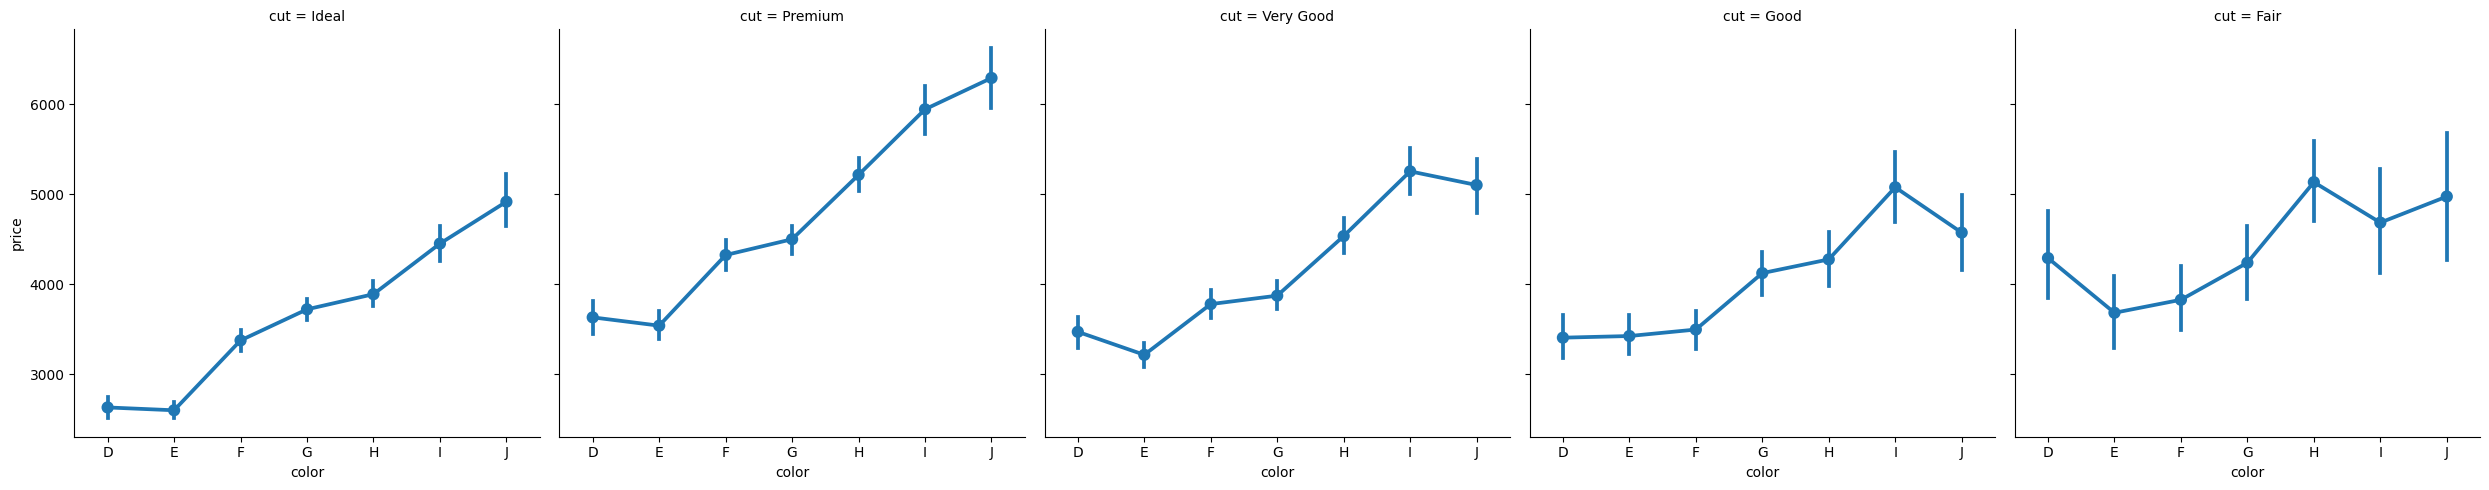

In [74]:
sns.catplot(data=df, x='color', y='price', col='cut',kind='point')

<AxesSubplot: >

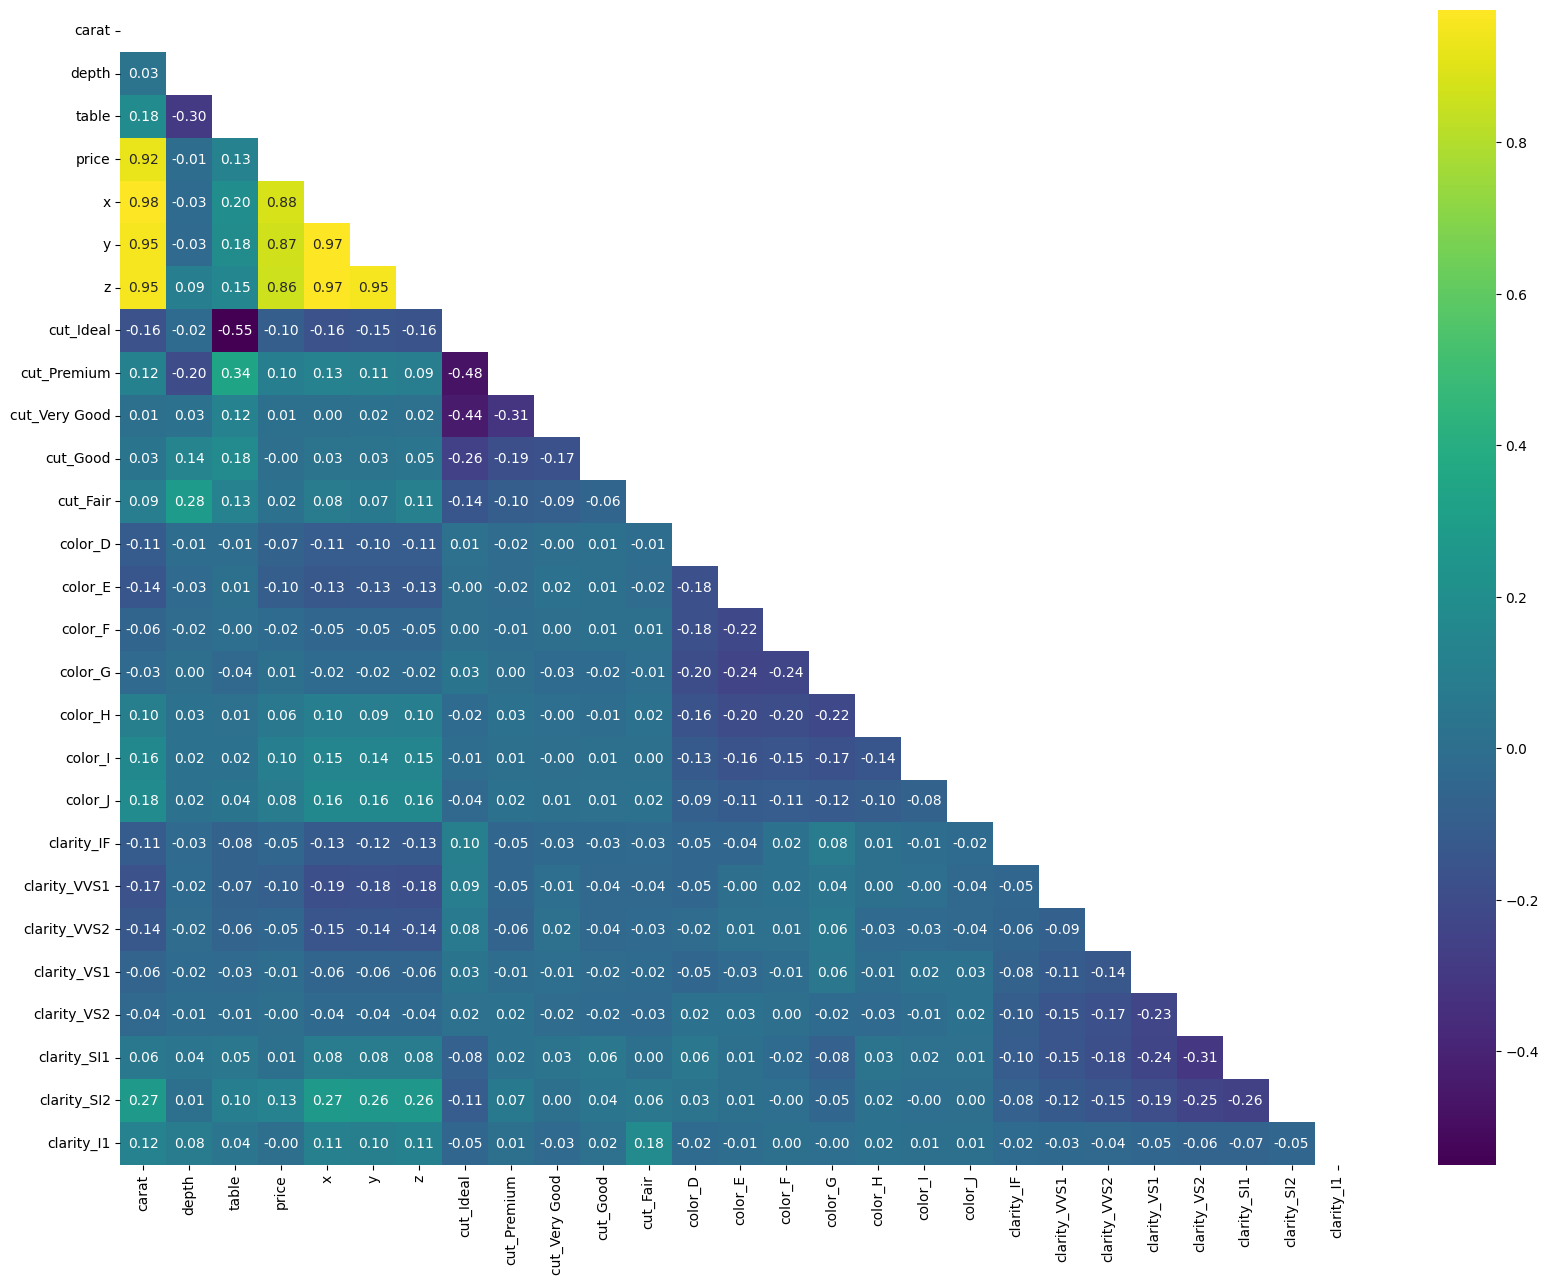

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.figure(figsize=(20,15))
df= pd.get_dummies(df)
df_corr=df.corr()
filter =np.triu(df_corr)
sns.heatmap(df_corr, annot=True, cmap='viridis', mask=filter, fmt=".2f")

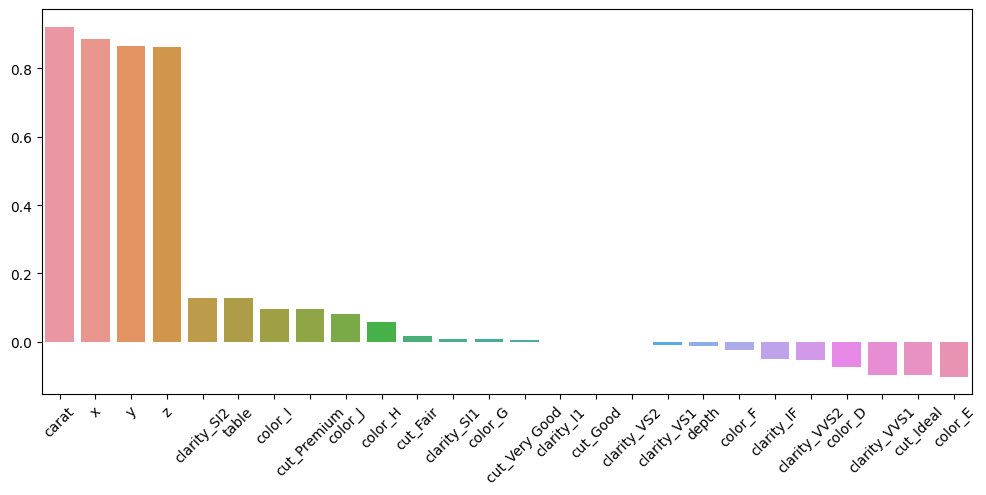

In [76]:
df_corr = df.corr()
corr_price = df_corr['price']
corr_price = corr_price.sort_values(ascending=False)[1:]
plt.figure(figsize=(12,5))
sns.barplot(x=corr_price.index, y=corr_price.values)
plt.xticks(rotation=45);

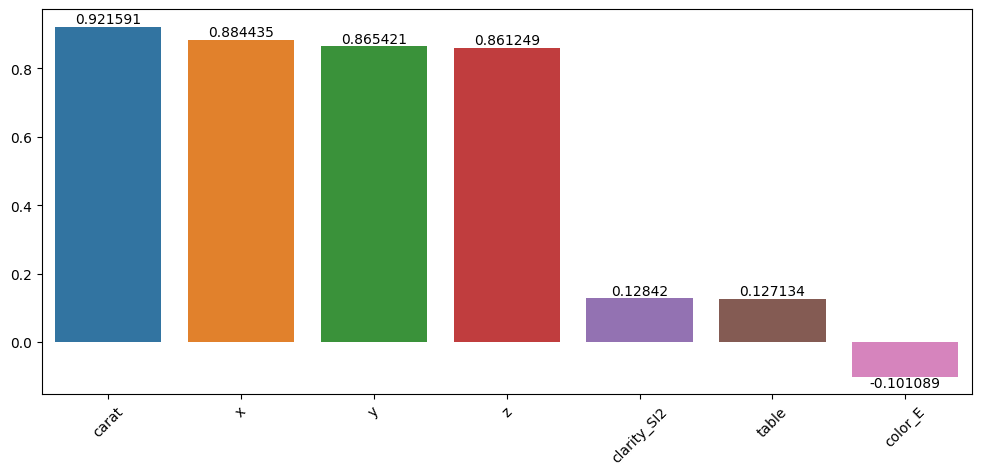

In [82]:
df_corr = df.corr()
corr_price = df_corr['price']
filter=(corr_price<-0.1)|(corr_price >0.1)
corr_price = corr_price[filter]
corr_price= corr_price.sort_values(ascending=False)[1:]

plt.figure(figsize=(12,5))
ax=sns.barplot(x=corr_price.index, y=corr_price.values)
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0]);